# **Project: Supervised Learning**

## **Introduction**

**Domain**: Healthcare

**CONTEXT**: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.

**DATA DESCRIPTION**: The data consists of biomechanics features of the patients according to their current conditions. Each patient is
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.


**Attributes**:
 - P_incidence
 - P_tilt
 - L_angle
 - S_slope
 - P_radius
 - S_Degree
 - Class

Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC

%matplotlib inline

##Load the Dataset

Read the dataset

In [2]:
# Read data as dataframe and display the shape and columns
normal = pd.read_csv('Normal.csv')
print('Shape of Normal: ', normal.shape)
print(normal.columns)

Shape of Normal:  (100, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [3]:
normal.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
typeh = pd.read_csv('Type_H.csv')
print('Shape of Type_H: ', typeh.shape)
print(typeh.columns)

Shape of Type_H:  (60, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [5]:
typeh.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [6]:
types = pd.read_csv('Type_S.csv')
print('Shape of Type_S: ', types.shape)
print(types.columns)

Shape of Type_S:  (150, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [7]:
types.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


Check the datatypes of attributes of the dataset

In [8]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [9]:
typeh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [10]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


In [11]:
normal['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [12]:
typeh['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [13]:
types['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

The three datasets seem to contain the same columns. The data seems to be similar and categorized by the attribute 'Class'. The first dataset is of class 'Normal, second is of class 'Type_H' and the third is of class 'Type_S'. Some of the Class attributes have been spelt differently although they imply the same 3 classes as specified above. So, ideally the datasets can be merged together into one single dataset after unifying the Class attribute.

## Data Preparation and Exploration

Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

In [14]:
# unify the variations in the 'Class' attribute
normal['Class'] = 'normal'
typeh['Class'] = 'type_h'
types['Class'] = 'type_s'

In [15]:
normal['Class'].value_counts()

normal    100
Name: Class, dtype: int64

In [16]:
typeh['Class'].value_counts()

type_h    60
Name: Class, dtype: int64

In [17]:
types['Class'].value_counts()

type_s    150
Name: Class, dtype: int64

Combine all the 3 DataFrames to form a single DataFrame

In [18]:
# Combine the three dataframes into one
data = pd.concat([normal,typeh,types], axis = 0, ignore_index=True)

In [19]:
data.shape

(310, 7)

In [20]:
data['Class'].value_counts()

type_s    150
normal    100
type_h     60
Name: Class, dtype: int64

In [21]:
# Display 5 random samples
data.sample(n = 5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
54,54.503685,6.819910,47.000000,47.683775,111.791172,-4.406769,normal
155,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,type_h
125,54.124920,26.650489,35.329747,27.474432,121.447011,1.571205,type_h
181,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,type_s
34,63.026300,27.336240,51.605017,35.690060,114.506608,7.439870,normal


Display Feature-wise percentage of Null values

In [22]:
# Null values in dataset
data.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

The dataset does not contain any null value

Check 5-point summary of the new DataFrame

In [23]:
data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


**Exploratory Data Analysis and Visualization**

Bivariate Analysis

Visualize a heatmap to understand correlation between all features

<ipython-input-24-06f81467c92d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


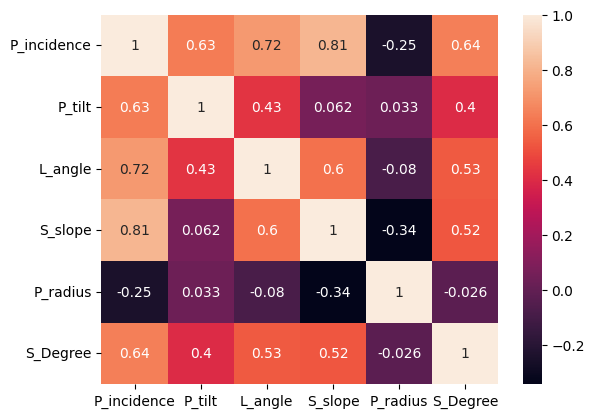

In [24]:
sns.heatmap(data.corr(), annot=True);

P_incidence has a strong positive correlation with all the other attributes except P_radius

P_tilt has positive correlation with P_incidence, L_angle and S_degree, while no correlation with S_slope and P_radius

S_slope and L_angle have a strong positive correlation with P_incidence but weeak correlation with the other attributes

P_radius does not have a strong correlation with any other attribute

**Strong correlation**:

P_incidence and S_slope: 0.81

P_incidence and L_angle: 0.72

**Weak correlation**:

P_tilt and P_radius: 0.033

P_tilt and S_slope: 0.062

L_angle and P_radius: -0.08

Visualize a pairplot with 3 classes

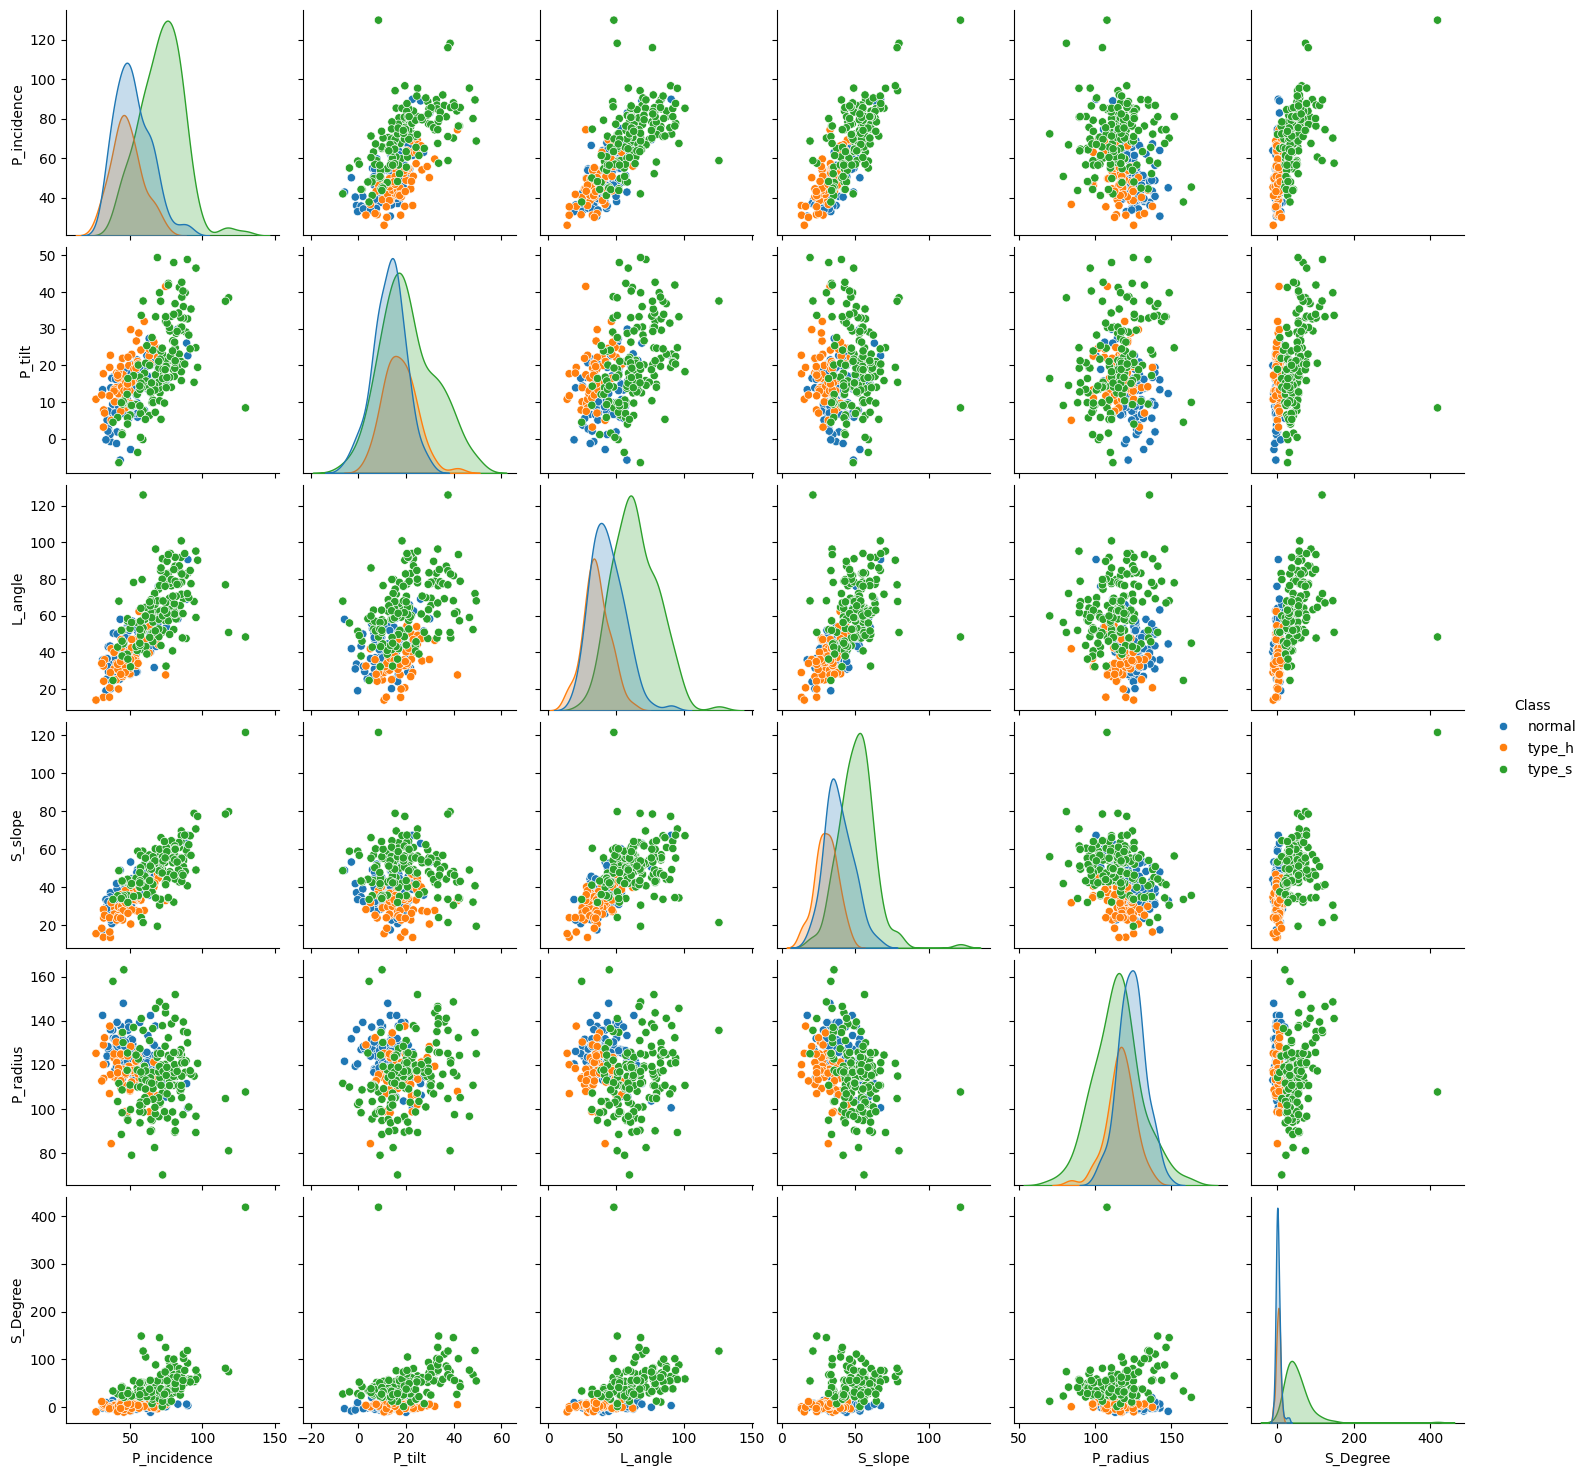

In [25]:
#Pairplot
sns.pairplot(data=data,vars=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree'], hue='Class');

Visualize a jointplot for 'P_incidence' and 'S_slope'

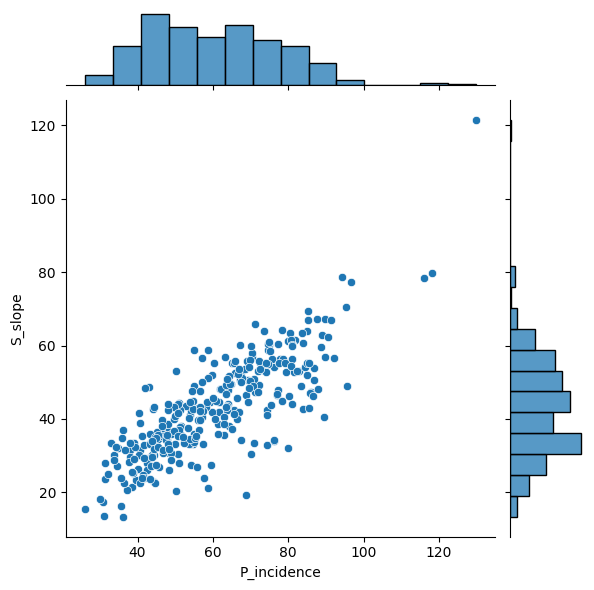

In [26]:
#Jointplot
sns.jointplot(data=data, x='P_incidence', y='S_slope');

There is a strong positive correlation between P_incidence and S_slope.

Both P_incidence and S_slope seem to be slightly right-skewed.

Univariate Analysis

Visualize a boxplot to check distribution of the features

<ipython-input-27-48f0ba05766d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P_incidence'],  ax=axes[0],color='Green')


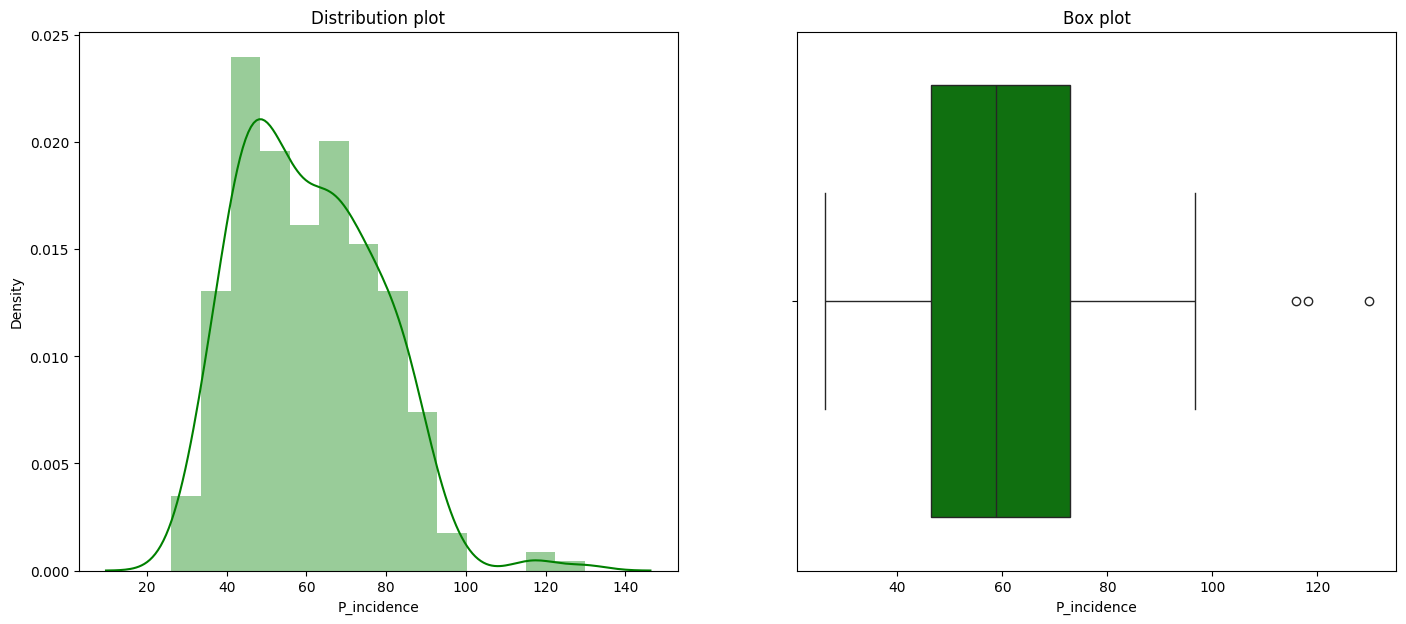

In [27]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_incidence', data=data,  orient='h' , ax=axes[1],color='Green')
sns.distplot(data['P_incidence'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

P-incidence has only 3 outliers greater than Q3 + 1.5xIQ and is slightly right-skewed because of that.

<ipython-input-28-f90bcd6d8267>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P_tilt'],  ax=axes[0],color='Green')


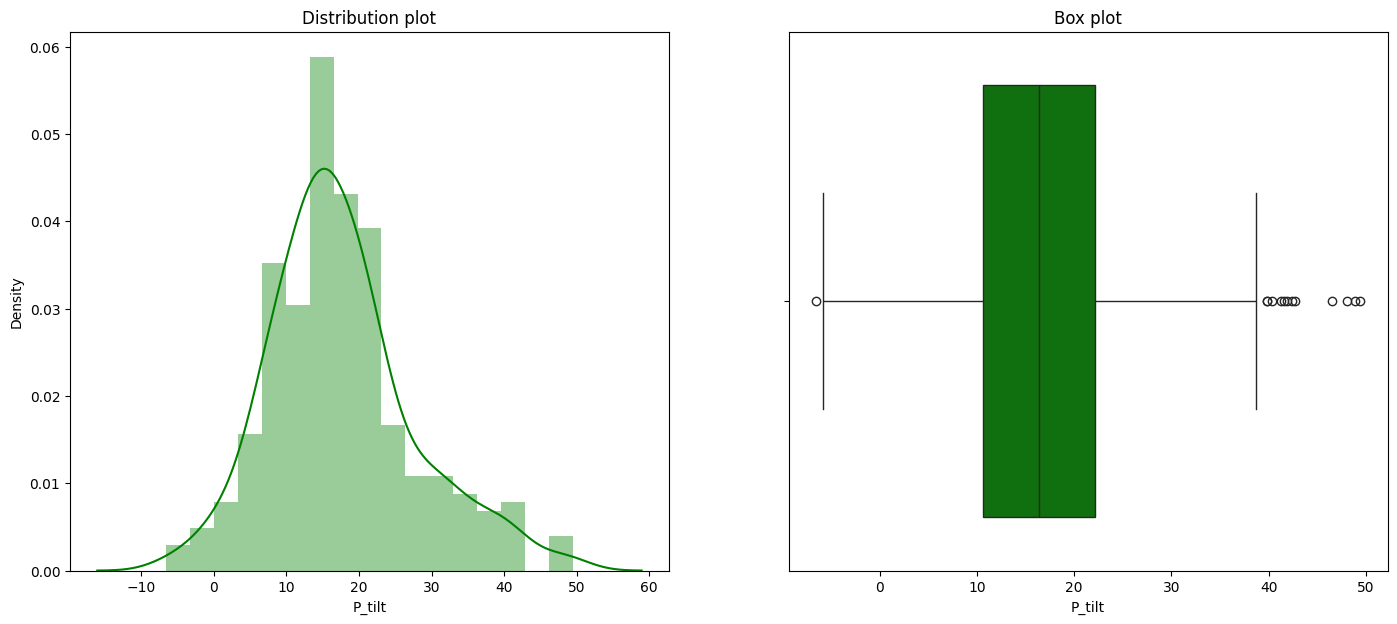

In [28]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_tilt', data=data,  orient='h' , ax=axes[1],color='Green')
sns.distplot(data['P_tilt'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

P_tilt has quite a few outliers greater than Q3 + 1.5xInterquartile range and so is right-skewed. It has one outlier below Q3 - 1.5xIQ.

<ipython-input-29-b94930cd34fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['L_angle'],  ax=axes[0],color='Green')


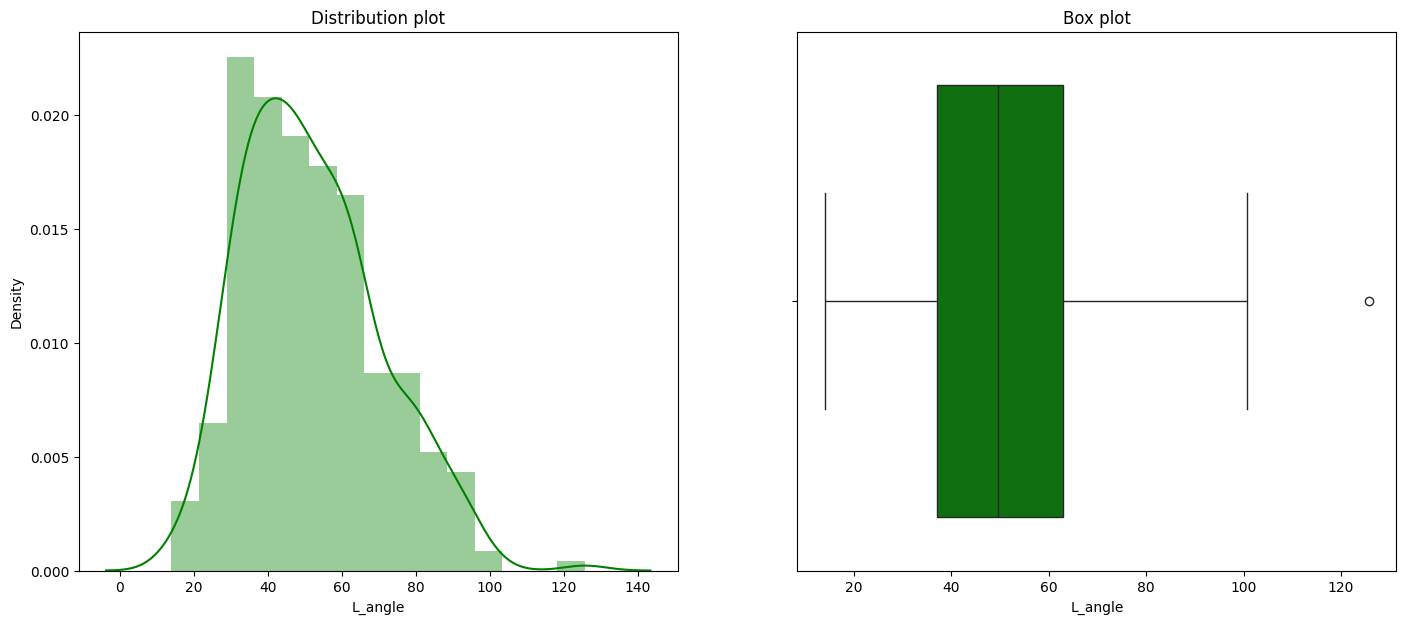

In [29]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'L_angle', data=data,  orient='h' , ax=axes[1],color='Green')
sns.distplot(data['L_angle'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

L_angle is slightly right-skewed because on one outlier greater than Q3 + 1.5xIQ

<ipython-input-30-625e2f7f599c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['S_slope'],  ax=axes[0],color='Green')


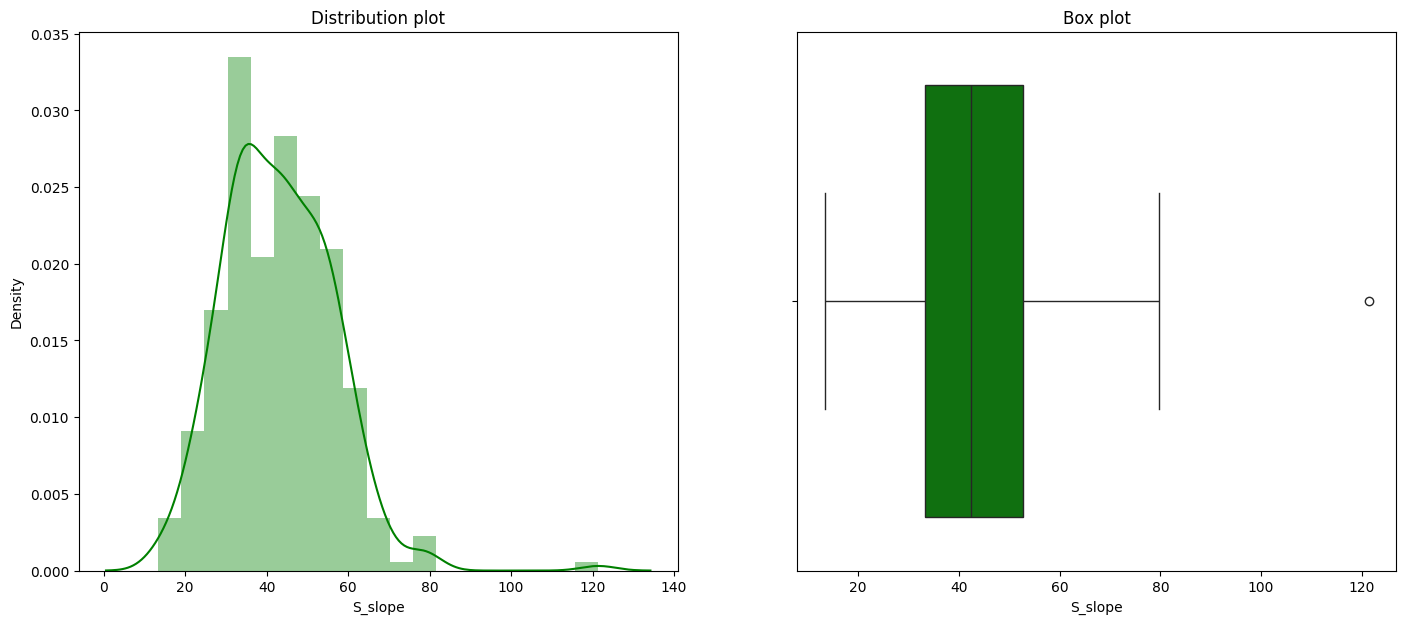

In [30]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_slope', data=data,  orient='h' , ax=axes[1],color='Green')
sns.distplot(data['S_slope'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

S_slope has slight right-skewness due to one outlier greater than Q3 + 1.5xIQ

<ipython-input-31-04a5f08f26cb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['P_radius'],  ax=axes[0],color='Green')


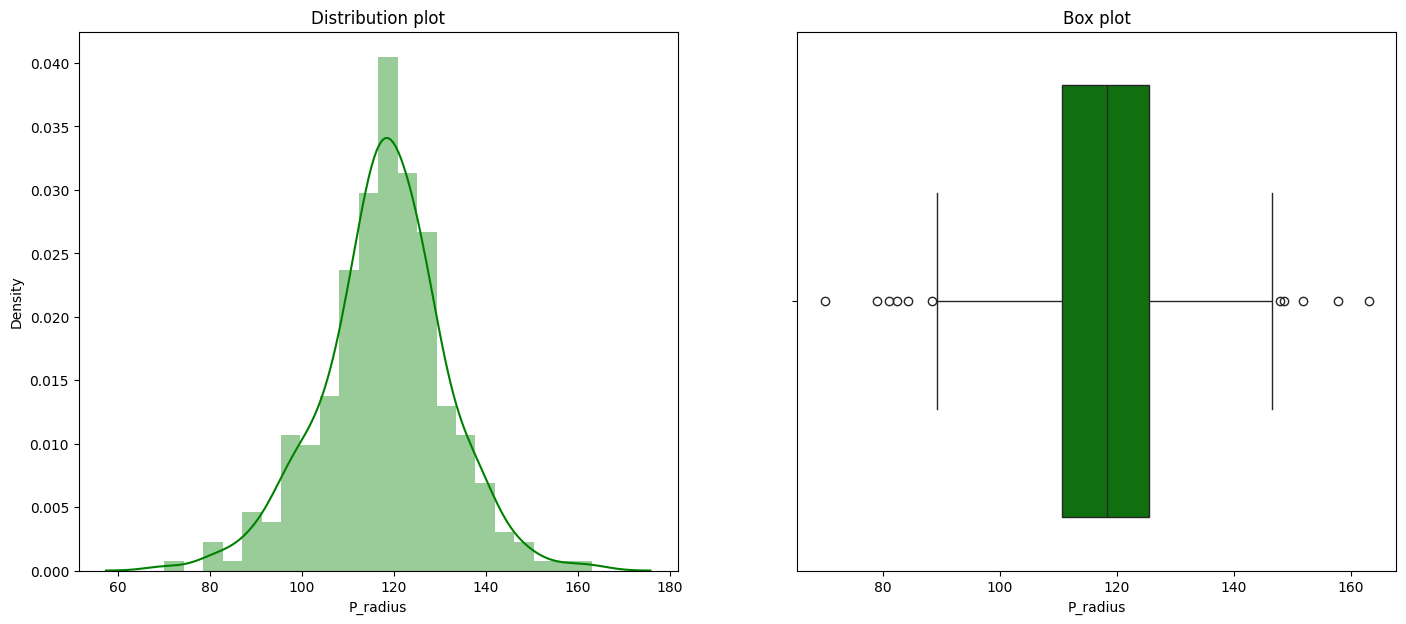

In [31]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'P_radius', data=data,  orient='h' , ax=axes[1],color='Green')
sns.distplot(data['P_radius'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

P_radius has quite a few outliers both greater than Q3 + 1.5xIQ and less than Q3 - 1.5xIQ

<ipython-input-32-4ae6e214287e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['S_Degree'],  ax=axes[0],color='Green')


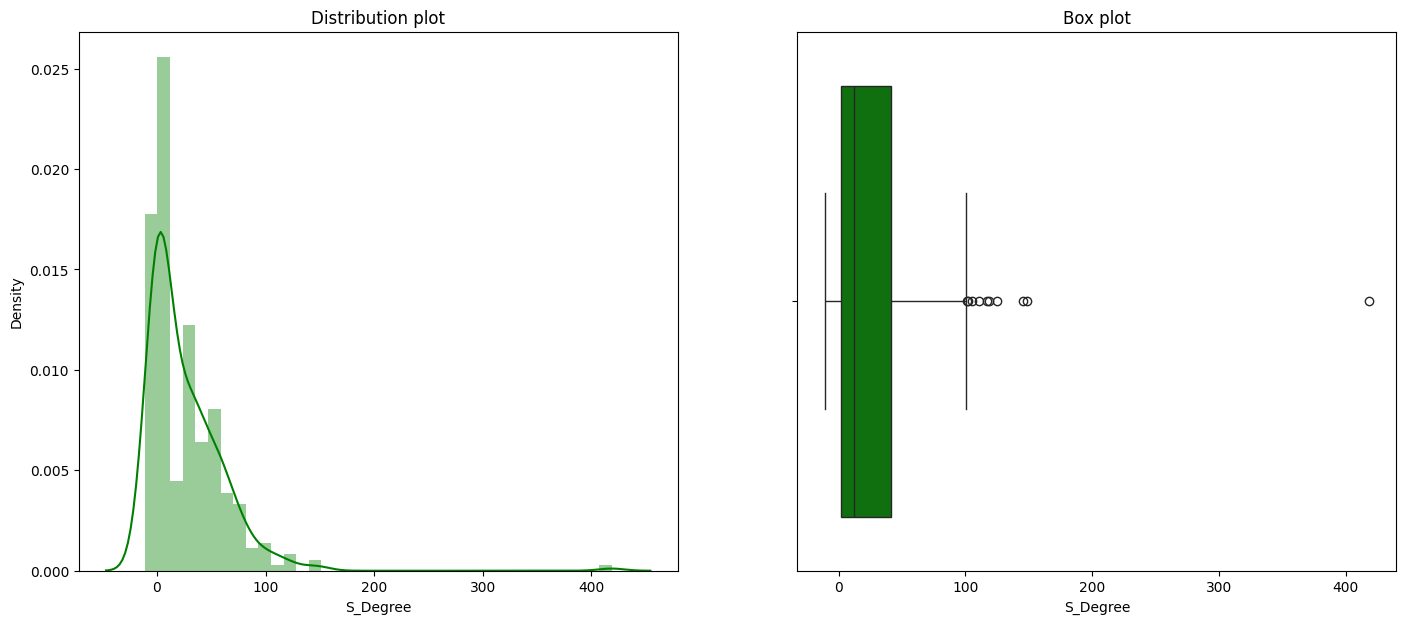

In [32]:
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'S_Degree', data=data,  orient='h' , ax=axes[1],color='Green')
sns.distplot(data['S_Degree'],  ax=axes[0],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

S_degree is right skewed due to a good number of outliers greater than Q3 + 1.5xIQ

## Model Training

Split data into X and Y - independent and dependent variables

In [33]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Check Target imbalance

In [34]:
data['Class'].value_counts()

type_s    150
normal    100
type_h     60
Name: Class, dtype: int64

Tha Target variable is not quite balanced with Type_S having 150 observations (48%) while Type_H having only 60 observations (19%).

Split data into train and test with 80:20 proportion

In [35]:
# Split data into train and test with 80:20 proportion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

Train a Supervised Learning Classification base model using KNN classifier

In [36]:
# Perform base KNN with K=3, Euclidean as distance metric
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Print the performance metrics for both train and test data

In [37]:
# Predict the label in the test dataset
# Calculate the accuracy score
predicted_labels = classifier.predict(X_test)
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9032258064516129
0.8709677419354839


Train data accuracy is 90.3% while test data accuracy is 87.1%, which clearly shows the model is overfitting.

In [38]:
print(np.concatenate((predicted_labels.reshape(len(predicted_labels),1), y_test.reshape(len(y_test),1)),1))

[['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_h' 'normal']
 ['type_s' 'type_s']
 ['normal' 'normal']
 ['normal' 'normal']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['normal' 'normal']
 ['type_s' 'type_s']
 ['normal' 'normal']
 ['normal' 'normal']
 ['type_h' 'type_h']
 ['type_s' 'type_s']
 ['normal' 'type_s']
 ['normal' 'normal']
 ['normal' 'normal']
 ['normal' 'type_h']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['normal' 'type_h']
 ['type_h' 'type_h']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_h' 'normal']
 ['type_s' 'type_s']
 ['normal' 'normal']
 ['normal' 'normal']
 ['type_h' 'normal']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_h' 'type_h']
 ['normal' 'normal']
 ['type_s' 'type_s']
 ['normal' 'normal']
 ['normal' 'type_h']
 ['type_h' 'type_h']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_h' 'type_h']
 ['normal' 'normal']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['type_s' 'type_s']
 ['normal' 'n

Confusion Matrix


<Axes: >

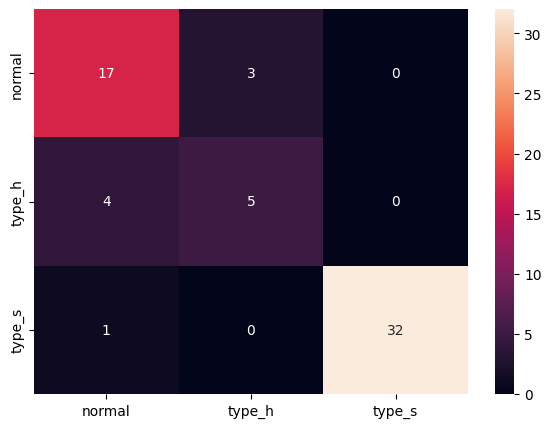

In [39]:
# Confusion Matrix
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["normal","type_h","type_s"])

df_cm = pd.DataFrame(cm, index = [i for i in ["normal","type_h","type_s"]],
                  columns = [i for i in ["normal","type_h","type_s"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [40]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

      normal       0.77      0.85      0.81        20
      type_h       0.62      0.56      0.59         9
      type_s       1.00      0.97      0.98        33

    accuracy                           0.87        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.87      0.87      0.87        62



Precision and Recall for Type_S are quite good at 1 and 0.97. This is primarily due to the data imbalance with the dataset having more Type_S data.

Similarly, Precision and Recall for Type_H are not as good at 0.62 and 0.56 because of the relatively low percentage of data containing Type_H class

## Model Improvement

Experiment with various parameters to improve performance of the base model

Find best value of K

In [41]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(30)
for i in range(1,31):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypred= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, ypred)

mean_acc

array([0.90322581, 0.87096774, 0.87096774, 0.91935484, 0.91935484,
       0.90322581, 0.90322581, 0.88709677, 0.90322581, 0.88709677,
       0.90322581, 0.88709677, 0.90322581, 0.88709677, 0.90322581,
       0.88709677, 0.90322581, 0.91935484, 0.91935484, 0.91935484,
       0.91935484, 0.90322581, 0.90322581, 0.90322581, 0.90322581,
       0.90322581, 0.91935484, 0.90322581, 0.91935484, 0.91935484])

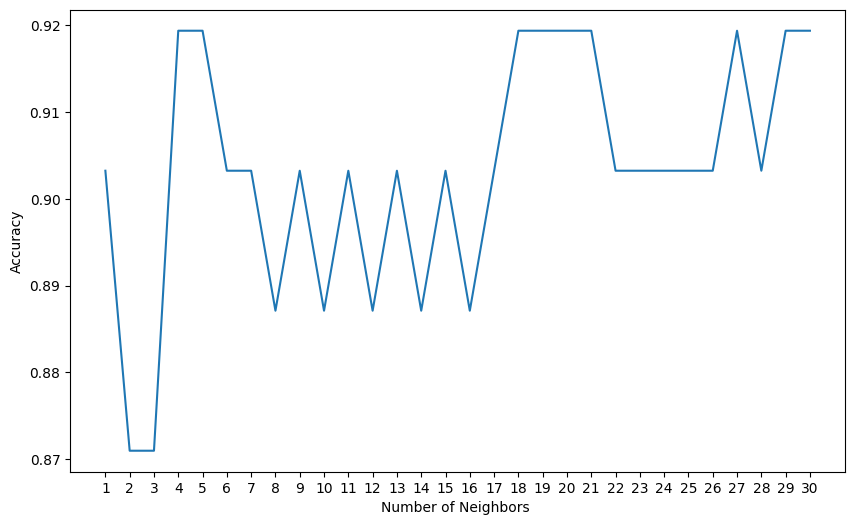

In [42]:
loc = np.arange(1,31,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,31), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

Accuracy is good for values of K: 5, 19, 21, 27, 29.

Use GridSearchCV to identify the best hyperparameters

In [43]:
grid_params = { 'n_neighbors' : [5,7,11,19,21,27,29],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=2)

# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 2 folds for each of 42 candidates, totalling 84 fits


In [44]:
g_res.best_score_

0.814516129032258

In [45]:
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

Based on the above, best model is with K=5 with Minkowski as the distance metric.

In [46]:
knnclassifier = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'minkowski')
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [47]:
# Predict the label in the test dataset
# Calculate the accuracy score
ypredicted_labels = knnclassifier.predict(X_test)
print(knnclassifier.score(X_test, y_test))

0.9193548387096774


In [48]:
print(classification_report(y_test, ypredicted_labels))

              precision    recall  f1-score   support

      normal       0.80      1.00      0.89        20
      type_h       1.00      0.56      0.71         9
      type_s       1.00      0.97      0.98        33

    accuracy                           0.92        62
   macro avg       0.93      0.84      0.86        62
weighted avg       0.94      0.92      0.91        62



Accuracy on the test data has increased from 87.1% to 91.9%

Class Normal:
Precision has increased slightly from 0.77 to 0.8, while recall has increased from 0.85 to 1 and f1-score from 0.81 to 0.89

Class Type_H:
Precision has increased from 0.62 to 1 while recall has remained same at 0.56. F1-score has increased from 0.59 to 0.71

Class Type_S:
Precision, recall and f1-score have remained the same at 1, 0.97 and 0.98